## 대표적인 이산형 확률 분표
- 베르누이분포 => 이항분포(binomial distribution)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline


'%.3f'

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [20]:
# 필요 함수 정의

# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 기댓값과 분산 계산 함수

# X가 이산형 확률 변수 인지 확인
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
# 그래프 작성 함수

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


#### 베르누이 분포

- 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
    - 베르누이 분포를 따르는 확률변수의 시행이 베르누이 시행
    - 1은 성공, 0은 실패 
    - 1이 나오는 확률 p, 0이 나오는 확률 1-p
    - 파라미터 p인 베르누이 분포는 Bern(p)
    ![](pic/베르누이함수.png)
    - 동전을 던져서 앞면이 나올 확률
    ![](pic/동전확률.png)
    - 주사위를 한 번 굴려 2가 나오지 않을 확률
    ![](pic/주사위확률.png)

In [21]:
def Bern(p) :
    x_set = np.array([0,1])
    def f(x) :
        if x in x_set : 
            return p ** x * (1-p)**(1-x)
        else : 
            return 0
    
    return x_set, f

In [22]:
p = 0.3 # 1이 나올 확률
X = Bern(p)

In [23]:
print(X)

(array([0, 1]), <function Bern.<locals>.f at 0x00000128AC92CB80>)


![](pic/베르누이기대값분산.png)

In [24]:
# 기대값과 분산
check_prob(X)

expected value 0.3
variance 0.21


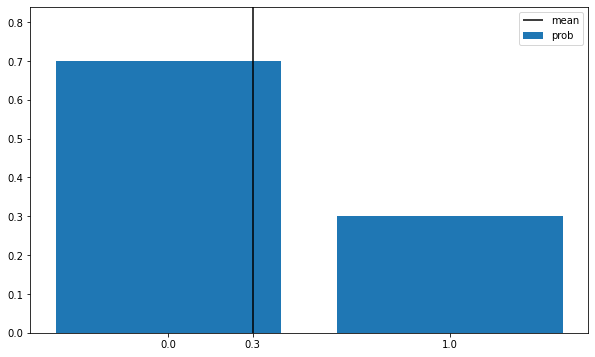

In [25]:
# 기대값과 확률의 관계
plot_prob(X)

# scipy.stats 모듈

- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지

    - SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공
    ![](pic/stats.png)

In [28]:
p = 0.3

# 인수로 확률 파라미터를 취하고 베르누이 분포를 따르는 object를 반환함
# 반환 object가 저장도니 변수 rv는 확률변수에 해당 함


rv = stats.bernoulli(p)


In [29]:
# pmf 메서드 : 확률 질량 함수
rv.pmf(0)
rv.pmf(1)

# 인수를 리스트로 넘길 수 있음
rv.pmf([0,1])

0.7000000000000001

0.3

array([0.7, 0.3])

In [30]:
# cdf 누적 분포 함수
rv.cdf([0,1])

array([0.7, 1. ])

In [31]:
# 기대값과 분산 계산
rv.mean()
rv.var()

0.3

0.21

![](pic/베르누이정리.png)

### 이항분포
- 성공 확률이 μ인 베르누이 시행을 N번 반복하는 경우
    - 가장 운이 좋을 때는 N번 모두 성공할 것이고, 운이 나쁜 경우에는 한번도 성공 못할 것
    - N번 시행 중 성공한 횟수를 확률변수 X라고 한다면 X의 값을 0부터 N가지 정수 중 하나가 됨
    ![](pic/이항분포.png)

- X = 성공의 확률이 p인 베르누이 시행을 n번 반복할 때 성공의 수가 따르는 분포
    - 𝑋가 가질 수 있는 값: 0, 1, 2, …, 𝑛
    - n번 던져서 x번 성공할 확률
    ![](pic/이항연산.png)
    



![](pic/comb1.png)
### 위 연산을 실행하는 함수 : comb

In [34]:
from scipy.special import comb
com = comb(5,2)

com

(5*4*3*2*1) / (2*1*(3*2*1))

10.0

10.000

In [35]:
from scipy.special import comb

def Bin(n, p) : 
    x_set = np.arange(n+1)
    def f(x) :
        if x in x_set : 
            return comb(n,x) * p ** x * (1-p) ** (n-x)
        else : 
            return 0
    return x_set, f

In [36]:
n = 10 
p = 0.3

X = Bin(n,p)

In [37]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [38]:
check_prob(X)

expected value 3.0
variance 2.1


In [40]:
x_set, f = X
x_set
f

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<function __main__.Bin.<locals>.f(x)>

In [41]:
np.array([f(x_k) for x_k in x_set])

array([2.825e-02, 1.211e-01, 2.335e-01, 2.668e-01, 2.001e-01, 1.029e-01,
       3.676e-02, 9.002e-03, 1.447e-03, 1.378e-04, 5.905e-06])

In [42]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


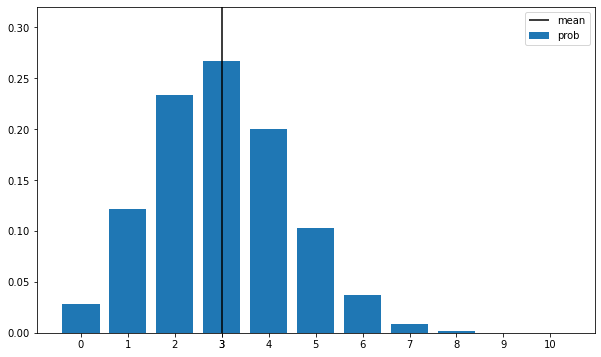

In [43]:
plot_prob(X)

### 성공할 확률(p)를 변경해  그래프를 그린 후 비교


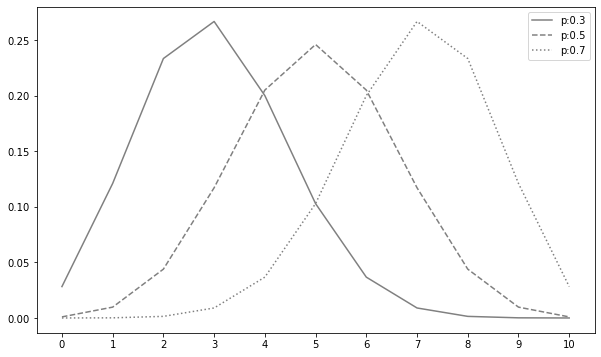

In [51]:
n = 10
linestyles = ['-', '--', ':']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)

# 성공확률 : 0.3 , 0.5, 0.7  일때 그래프 비교
for p, ls in zip([0.3,0.5,0.7], linestyles) :
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls = ls, color = 'gray')
    
ax.set_xticks(x_set)
ax.legend()

plt.show()


In [54]:
list(zip([0.3,0.5,0.7], linestyles))

[(0.300, '-'), (0.500, '--'), (0.700, ':')]

### 파이썬 scipy 모듈의 stats.binom 함수 사용하여 이항확률변수 생성

- stats.binom(시행횟수, 성공확률)


In [56]:
#  성공확률이 0.6인 베르누이 시행을 10번 반복했을 때의 확률변수 rv 생성하시오.

N = 10
mu = 0.6
rv = stats.binom(N,mu)
rv



In [57]:
xx = np.arange(N+1)
print(xx)
rv.pmf(xx)

[ 0  1  2  3  4  5  6  7  8  9 10]


array([1.049e-04, 1.573e-03, 1.062e-02, 4.247e-02, 1.115e-01, 2.007e-01,
       2.508e-01, 2.150e-01, 1.209e-01, 4.031e-02, 6.047e-03])

<BarContainer object of 11 artists>

Text(0.5, 0, '표본값')

Text(0, 0.5, '$P(x)$')

Text(0.5, 1.0, '이항분포의 확률질량함수')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from c

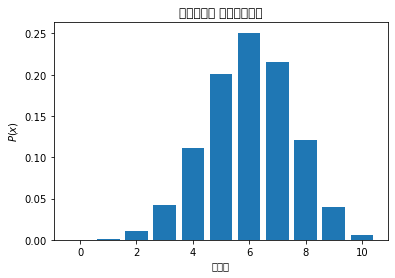

In [58]:
xx = np.arange(N+1)
plt.bar(xx,rv.pmf(xx), align='center')

plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()


### rvs 함수

- binom.rvs 함수는 이항분포를 따르는 난수를 생성시킴
- 인자 : n, p, size, random_state


In [59]:
from scipy.stats import binom

binom.rvs(n=50, p=0.5, size=3)

array([27, 27, 20])

In [64]:
binom.rvs(n=50, p=0.5, size =3 , random_state=3)
binom.rvs(n=50, p=0.5, size =3 , random_state=3)

array([25, 27, 23])

array([25, 27, 23])

In [65]:
# rvs 메서드로 무작위 표본을 뽑아내는 시뮬레이션을 한 결과 생성되는 난수는 이항 분포를 따르게 된다.
np.random.seed(0)
x = rv.rvs(100)
len(x)
x


100

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

Text(0.5, 1.0, '이항분포의 시뮬레이션 결과')

Text(0.5, 0, '표본값')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from c

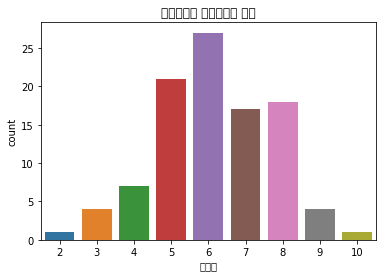

In [66]:
import seaborn as sns
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()


#### 포아송 분포
- 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다.
-  예.
    - 119 구조대에 걸려오는 시간 당 전화 횟수
    - 1년 동안 발생하는 진도 4 이상의 지진 횟수
    - 프러시아 기병 중에서 매년 말에 차여 사망하는 병사의 수
    - 한 야구경기에서 실책의 수
    - 서울지역의 5월 중 부도를 낸 중소기업 수
    ![](pic/포아송.png)


- 하루에 평균 2건의 교통사고가 발생하는(Poi(2))
![](pic/교통사고.png)

In [76]:
# 편의상 x_set 을 0~19 이하인 정수로 가정
from scipy.special import factorial

def Poi(lam) :
    x_set = np.arange(20)
    def f(x) :
        if x in x_set :
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else : 
            return 0
    return x_set, f


In [77]:
X = Poi(10)  # 평균 발생 횟수

In [78]:
x_set, F = X
prob = np.array([f(x_k) for x_k in x_set])

In [79]:
x_set
prob

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([2.825e-02, 1.211e-01, 2.335e-01, 2.668e-01, 2.001e-01, 1.029e-01,
       3.676e-02, 9.002e-03, 1.447e-03, 1.378e-04, 5.905e-06, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])